# Time Series Forecasting 01: Understanding Time Series Forecasting

In [ ]:
#pip install statsmodels

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

## read a dataset 
It includes the quarterly earnings per share in US dollars of Johnson & Johnson stock from 1960 to 1980

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [11]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [12]:
df.dtypes

date     object
data    float64
dtype: object

In [13]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(5)

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


## Visualize the time series

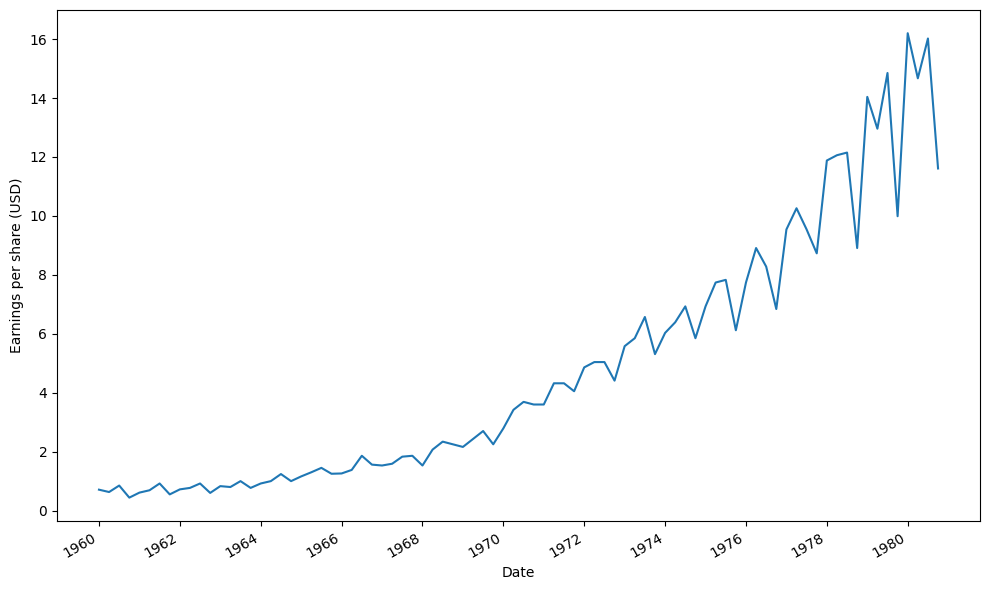

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate() #This method automatically formats the x-axis labels, especially when they contain dates.
plt.tight_layout() #This method adjusts the spacing between the plot elements to make sure everything fits within the figure area without overlapping.

plt.savefig('figures/Johnson and Johnson Stock Price.png', dpi=300) # save the graph to figures in current directory

## Decompose a time series

In [17]:
# period is 4 since we have quarterly data

advanced_decomposition = STL(df.data, period=4).fit()

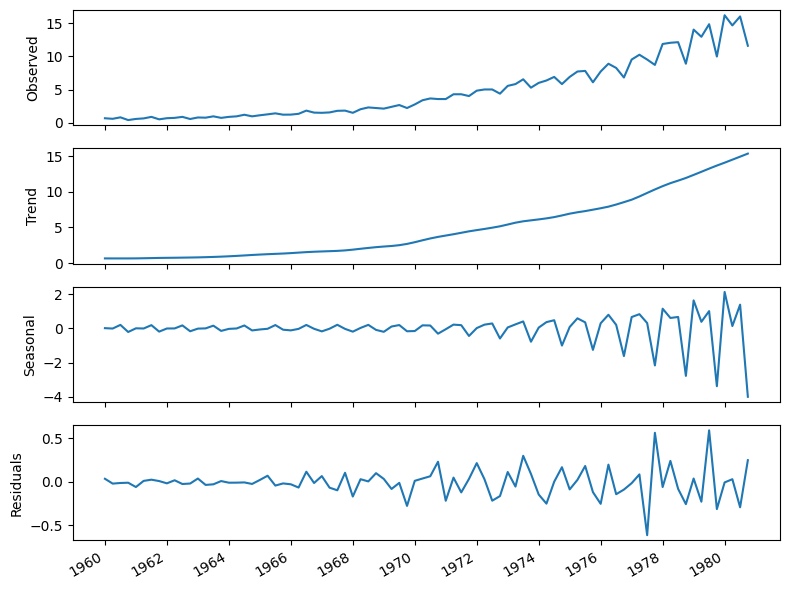

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8,6))

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/Johnson and Johnson Stock Price Decomposition.png', dpi=300)

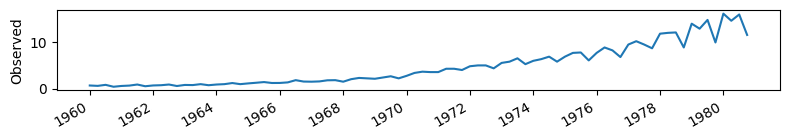

In [24]:
fig, ax = plt.subplots(figsize=(8, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

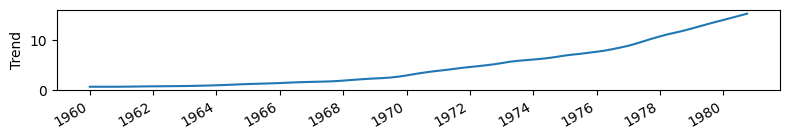

In [25]:
fig, ax = plt.subplots(figsize=(8, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

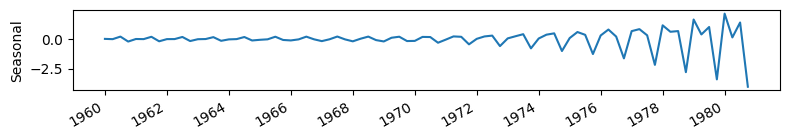

In [26]:
fig, ax = plt.subplots(figsize=(8, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

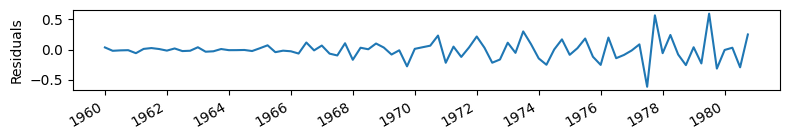

In [27]:
fig, ax = plt.subplots(figsize=(8, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()